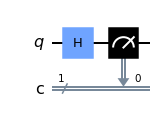

In [2]:
from qiskit import QuantumRegister, \
    ClassicalRegister, QuantumCircuit
# QuantumRegister is collection of 1 or more qubits
# ClassicalRegister is collection of 1 or more bits

import matplotlib
qReg = QuantumRegister(1, 'q') # Creates of QuantumRegister of 1 Wire qReg[0] labelled 'q'. It has a single |0> qubit
cReg = ClassicalRegister(1, 'c') # Creates a ClassicalRegister of 1 wire cReg[0] labelled 'c'.
circuit = QuantumCircuit(qReg, cReg) # forms quantum circuit by combining the registers
# Quantum register stores qubits for calculations
# Classical register stores results after measurements
circuit.h(qReg[0]) # adds a hadamard gate to quantum register's first wire
circuit.measure(qReg[0], cReg[0]) # measures first qubit in quantum register and returns output to first wire in classical register
display(circuit.draw('mpl')) # displays drawing of circuit

db572090-82a5-49ed-ab92-d749b1434a02
{'1': 479, '0': 521}


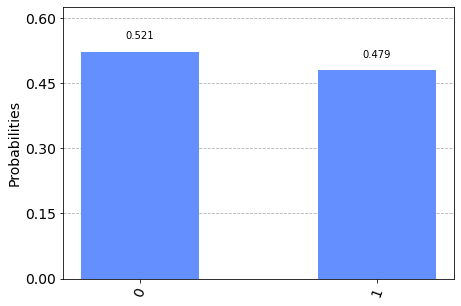

In [3]:
from qiskit import Aer
device = Aer.get_backend('qasm_simulator') # backend is a computer that runs the circuit
# simulator is classical computer mimicking quantum computer
# Aer provides access to several simmulators that work on local machine
from qiskit import execute
from qiskit.visualization import plot_histogram

job = execute(circuit, backend=device, shots=1000) # runs backend and returns information about run
 # shot is number of runs on quantum computer
print(job.job_id())

result = job.result() # filters information about job such as  amount of memory used, amount of time taken, tallies of measurments from all shots
counts = result.get_counts(circuit) # shifts measurmeent tallies from result object

print(counts) # gives number of zeroes and ones in output
display(plot_histogram(counts)) # shows in graphical format with proportion


In [4]:
from qiskit import IBMQ

IBMQ.save_account('d2f91bb3087e1a098ef97e898a960e54d3d530cf59dee7e09e558cbae70c53766bf862f5a97858df9a0e188b3f5c550d12c1345db93c2b5dabfb76fc2bbd1e8e', overwrite=True)
# top line saves account to disk
provider = IBMQ.load_account() # provider is an agent that can get you backends to use
backends = provider.backends(operational=True, min_num_qubits=5)
# provides access to cloud based backends be it simulators or real QCs
for i in backends:
    print(i)

c:\Users\param\WorkSpace\quantum-computing\experimenting_qiskit\env\lib\site-packages\requests_ntlm\requests_ntlm.py:5: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography import x509


ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_sherbrooke
ibm_brisbane
ibm_kyoto
ibm_osaka


cop42qaiaqtdugvsdtb0
test
{'0': 496, '1': 504}


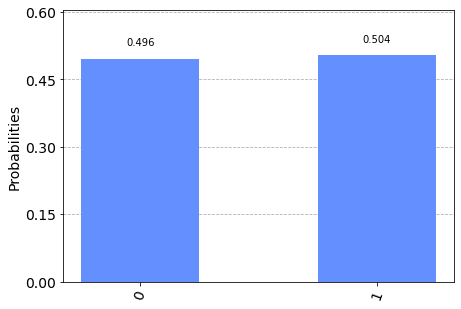

In [5]:
from qiskit import execute
from qiskit.visualization import plot_histogram

device = provider.get_backend('ibmq_qasm_simulator') # simulator quantum computer

job = execute(circuit, backend=device, shots=1000)
print(job.job_id())

result = job.result()
print('test')
counts = result.get_counts(circuit)

print(counts)
display(plot_histogram(counts))

crs433m7wv80008f5y40
test
{'1': 7, '0': 3}


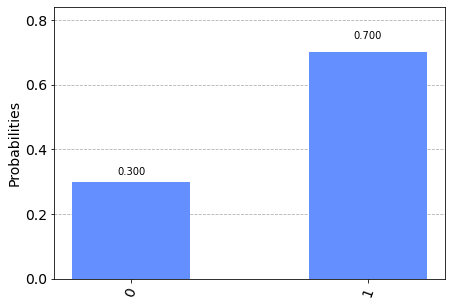

In [6]:
from qiskit import execute
from qiskit.visualization import plot_histogram
import time

device = provider.get_backend('ibm_kyoto')
# actual quantum computer

job = execute(circuit, backend=device, shots=10)
print(job.job_id())

result = job.result()
print('test')
counts = result.get_counts(circuit)

print(counts)
display(plot_histogram(counts))
